# Capstone project: Providing data-driven suggestions for HR

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


**PACE stages**

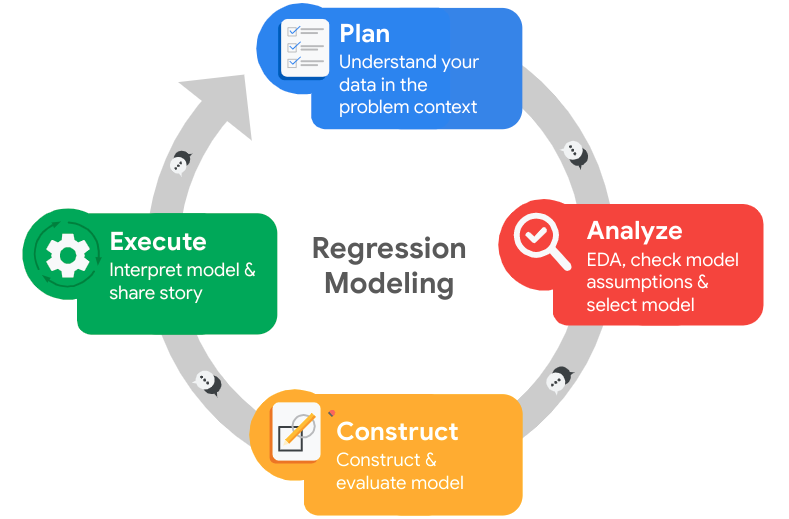

## Pace: Plan Stage

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the Business Scenario and Objective

The HR department at Salifort Motors wants to take <mark>some initiatives to improve employee satisfaction levels at the company</mark>. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: <mark>what’s likely to make the employee leave the company?</mark>

Your goals in this project are to analyze the data collected by the HR department and to <mark>build a model that predicts whether or not an employee will leave the company</mark>.

If you can predict employees likely to quit, it might be possible to <mark>identify factors that contribute to their leaving</mark>. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Brainstorm for Intuitions of the Objective

Before start looking at the given dataset, brainstorming for any intuition could be helpful in building context. And it is important to avoid being limited by what is available. 

1. Intuitions of the Main Objective
   - Ask yourself: If you're an employee, what would make you leave the company?
     - Longer working hours or lower payment, or poor working conditions
     - Time with the company
     - Not being valued or built toward my career
     - ...
2. Check the given dataset, or collect data to approach identified fields
3. Explore Data

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

- _Who are your stakeholders for this project?_
  - Human Resource department
- _What are you trying to solve or accomplish?_
  - Finding the factors affecting employee retention
  - Through model predicting whether an employee has left or not
- _What are your **initial observations** when you explore the data?_
  - ...
- _What resources do you find yourself using as you complete this stage? (Make sure to include the links.)_
  - Setting the Context and asking ChatGPT to provide some intuitions of the problem
  - ...
- Do you have any ethical considerations in this stage?
  - Gender of the employee, we should model to avoid the biases on gender




### Code

#### Import packages

In [70]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set()
plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')

In [71]:
import plotly.io as pio
pio.templates
# Available plotly templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

#### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [72]:
df = (
    pd.read_csv("./HR_capstone_dataset.csv")
    .astype({
        "Department": "category", 
        "salary": "category",
        "Work_accident": bool,
        "left": bool,
        "promotion_last_5years": bool,
    })
)
print(df.shape)
df.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,False,True,False,sales,low
1,0.80,0.86,5,262,6,False,True,False,sales,medium
2,0.11,0.88,7,272,4,False,True,False,sales,medium
3,0.72,0.87,5,223,5,False,True,False,sales,low
4,0.37,0.52,2,159,3,False,True,False,sales,low


#### Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)


##### Gather basic information about the data

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  bool    
 6   left                   14999 non-null  bool    
 7   promotion_last_5years  14999 non-null  bool    
 8   Department             14999 non-null  category
 9   salary                 14999 non-null  category
dtypes: bool(3), category(2), float64(2), int64(3)
memory usage: 659.8 KB


##### Gather descriptive statistics about the data

In [74]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [75]:
df.Department.value_counts(normalize=True).to_frame().T
# "sales" is the most common

Department,sales,technical,support,IT,product_mng,marketing,RandD,accounting,hr,management
proportion,0.276018,0.181345,0.14861,0.081805,0.060137,0.057204,0.05247,0.051137,0.04927,0.042003


In [76]:
df.salary.value_counts(normalize=True).to_frame().T
# most are low and medium, only few are high

salary,low,medium,high
proportion,0.487766,0.429762,0.082472


##### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [77]:
df.columns.map(lambda s: s.lower())

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [78]:
# Display all column names
### YOUR CODE HERE ###
df.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [79]:
# Rename columns as needed
df.columns = (
    df.rename(columns={"average_montly_hours": "average_monthly_hours"})
    .columns.map(lambda s: s.lower())
)
# Display all column names after the update
df.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

##### Check missing values

- Check for any missing values in the data.

In [80]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

##### Check duplicates

- Check for any duplicate entries in the data.

In [81]:
# Check for duplicates
### YOUR CODE HERE ###
dups = (
    df[df.duplicated(keep=False)]
    .sort_values([
        "satisfaction_level", "last_evaluation", "number_project",
        "average_monthly_hours", "time_spend_company", "department",
    ])
)
print(dups.shape)

(5346, 10)


In [82]:
# Inspect some rows containing duplicates as needed
dups.head()
# some are duplicated

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,False,True,False,accounting,low
12030,0.09,0.62,6,294,4,False,True,False,accounting,low
14241,0.09,0.62,6,294,4,False,True,False,accounting,low
71,0.09,0.77,5,275,4,False,True,False,product_mng,medium
12071,0.09,0.77,5,275,4,False,True,False,product_mng,medium


In [83]:
dups.tail()
# duplicated at tail

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
13089,1.0,0.88,6,201,4,False,False,False,technical,low
11375,1.0,0.93,5,167,3,False,False,False,sales,medium
13586,1.0,0.93,5,167,3,False,False,False,sales,medium
10691,1.0,0.93,5,231,2,False,False,False,marketing,medium
12902,1.0,0.93,5,231,2,False,False,False,marketing,medium


In [84]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
ddf = (
    df.drop_duplicates().reset_index(drop=True)
)
ddf[ddf.duplicated(keep=False)]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary


##### Check outliers

Check for outliers in the data.

In [85]:
ddf.time_spend_company.describe().to_frame().T
# max is at 10 years, but average is around 3.36

,count,mean,std,min,25%,50%,75%,max
time_spend_company,11991.0,3.364857,1.33024,2.0,3.0,3.0,4.0,10.0


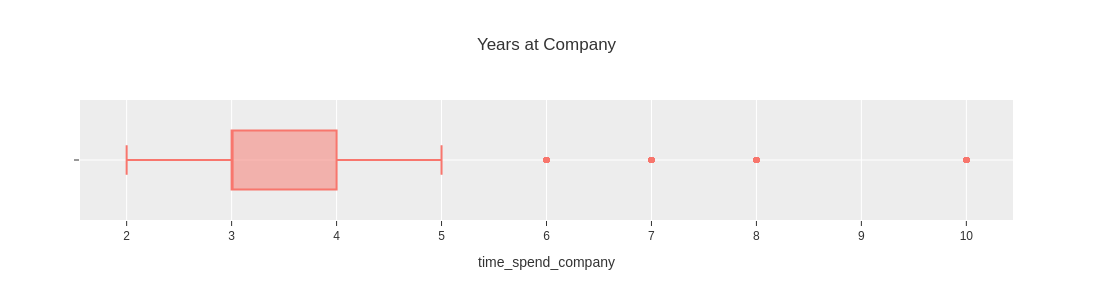

In [86]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
fig = px.box(
    # ddf, x="time_spend_company", y="left", color="left", 
    ddf, x="time_spend_company", 
    height=300, title="Years at Company", template="ggplot2",
)
fig.show()

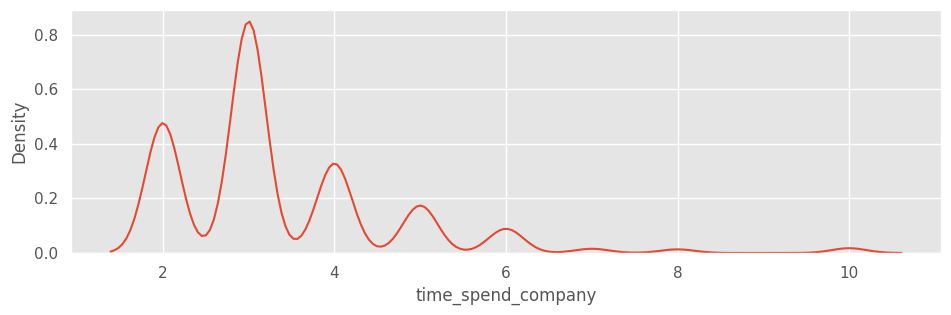

In [87]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.kdeplot(ddf.time_spend_company, ax=ax)
fig.show()

In [88]:
# Determine the number of rows containing outliers

# ddf.query("time_spend_company > 5").shape # 824 rows
iqr = (
    ddf.time_spend_company.quantile(0.75) - 
    ddf.time_spend_company.quantile(0.25)
)
threshold = 1.5 * iqr +  ddf.time_spend_company.quantile(0.75) 
threshold
ddf.query("time_spend_company > @threshold").shape # same, 824 rows

(824, 10)

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




### Code

#### Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [21]:
ddf.left.value_counts(normalize=True).to_frame()
# highly imblanced, need to address the issue

,proportion
left,
False,0.833959
True,0.166041


In [22]:
ddf.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'work_accident',
 'left',
 'promotion_last_5years',
 'department',
 'salary']

#### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

<mark>**List of Hypothese to Explore**</mark>

- Tenure-related
  - Bucketise the tenure and check relationship to Churn
  - Do employees with longer time in the company are likely to leave? 
  - Time at the company with satisfaction level to Churn?
  - <font color='crimson'>TODO</font>:
    - ...
- Workload-related
  - More projects contributed to, more likely to Churn?
  - More projects done are related to longer working hours? What is the relationship to Churn?
  - Do higher performance employees are likely to leave? If further consider their Satisfaction Level?
  - <font color='crimson'>TODO</font>:
    - Plot N projects done to Churn
    - Plot N projects done with Working Hours to Churn
- Interaction between Features
  - ...
  - <font color='crimson'>TODO</font>:
- Ratio of Something
  - ...
- Aggregation by Categories on another Variable
  - Mean, Median or STD of Satisfaction Level
- ...

**Notes with Explorations**

- Box plot shows the aggregated statistics, but sometimes Scatter plot will give more information
- At most you could show relationship between 3 variables
  - Maybe further with dimension reduction techniques
- ...

##### Heatmap with Target Variable

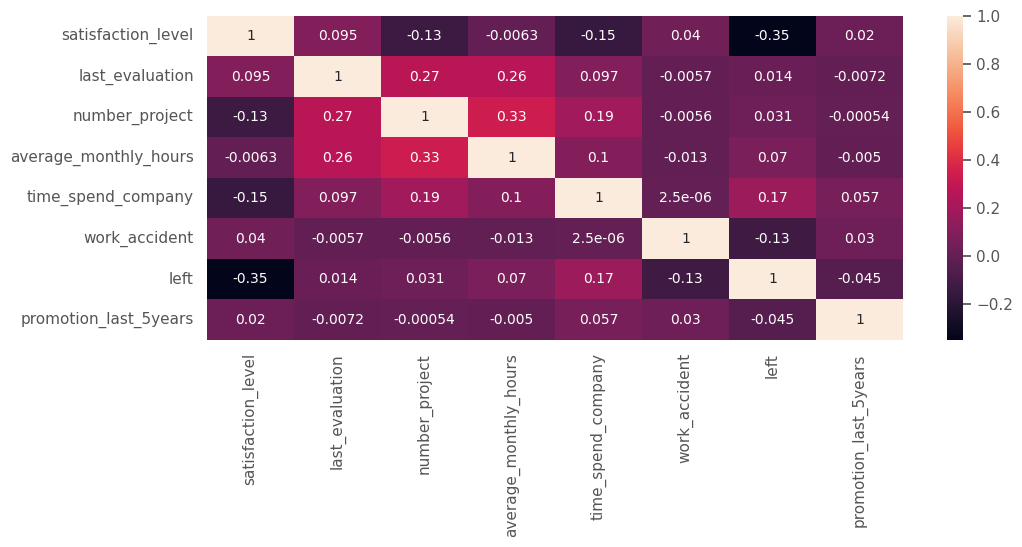

In [137]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(ddf.corr(numeric_only=True), annot=True, ax=ax)
fig.show()
# satisfaction level has the highest negative correlation with left
# number of projects and monthly hours are positively coorelated, also 

##### X vs. Target Variable

In [129]:
def rand_jitter(arr, factor=1):
    """Helper function to add jitter to a given array"""
    stdev = factor * .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

> Satisfaction Level

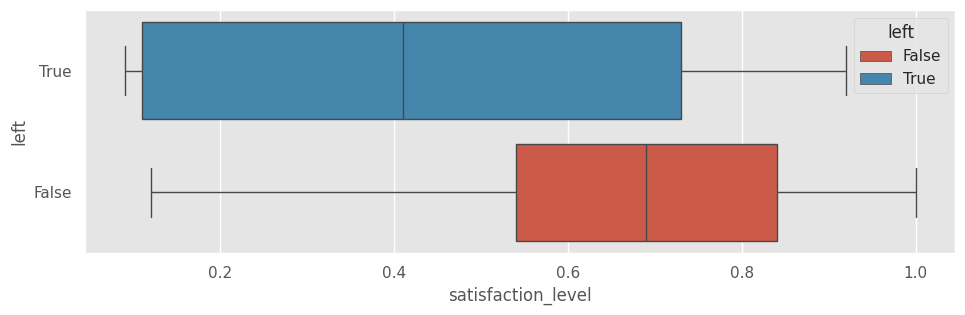

In [128]:
# Create a plot as needed
fig, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(x=ddf.satisfaction_level, y=ddf.left.astype(str), hue=ddf.left, ax=ax)
fig.show()
# for not-left, higher satfisfaction level on average 

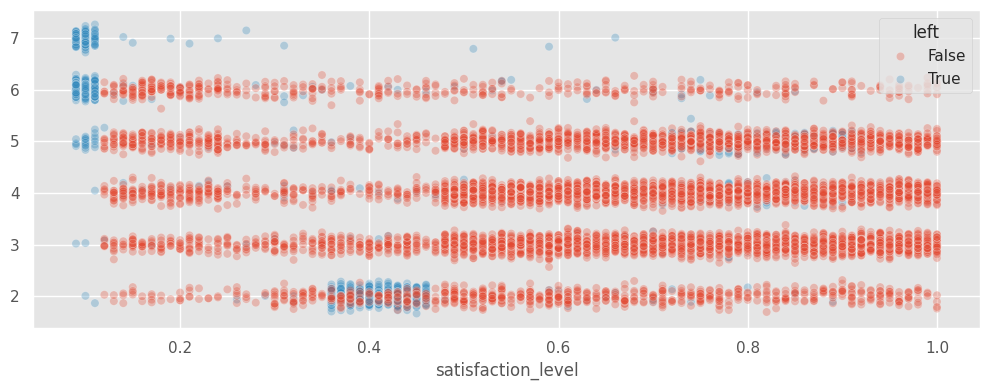

In [130]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot( 
    ddf,  x="satisfaction_level", hue='left', 
    # y="number_project",
    y=rand_jitter(ddf.number_project.values, factor=2),
    alpha=0.3, ax=ax,
)
fig.tight_layout()
fig.show()
# employees with lower satisfaction level are likely to leave
# but there're employees with around 0.4 satisfaction only works on 2 projects
# are they satfisfied in some degree beccause lower work load? 

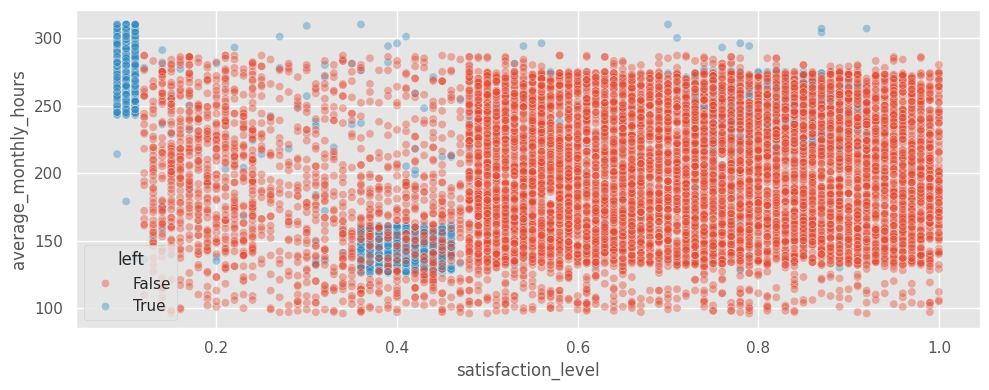

In [131]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.scatterplot(
    ddf, ax=ax,
    x="satisfaction_level", 
    y="average_monthly_hours", 
    hue='left', alpha=0.4
)
fig.tight_layout()
fig.show()
# there's a cohort of employees with longer hours and low satisfaction level all have chunred

In [ ]:
# department and satisfaction level



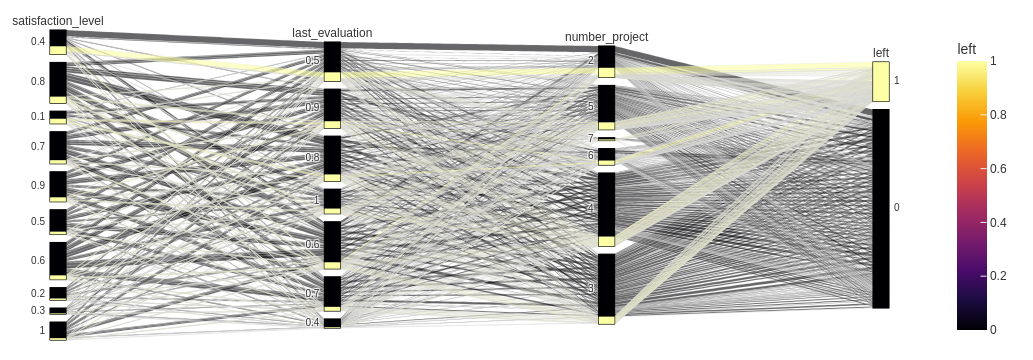

In [135]:
tmp = (
    ddf.assign(
        satisfaction_level=lambda d: d.satisfaction_level.round(1), 
        last_evaluation=lambda d: d.last_evaluation.round(1), 
        average_monthly_hours=lambda d: d.average_monthly_hours.div(100).round(1).multiply(100) 
        
    )
    .astype({"left": int})
    .sort_values("satisfaction_level")
    [["satisfaction_level", "last_evaluation", "number_project", "left"]]
)
fig = px.parallel_categories(
    tmp, template="ggplot2", color="left",
    color_continuous_scale=px.colors.sequential.Inferno,
)
fig.update_layout(dict(margin=dict(t=30, b=20, l=10, r=10)))
fig.show()
# parallel categories also shows that employees with satisfaction level at 0.4 is more likely to leave 
# than lower level employees

In [145]:
ddf.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

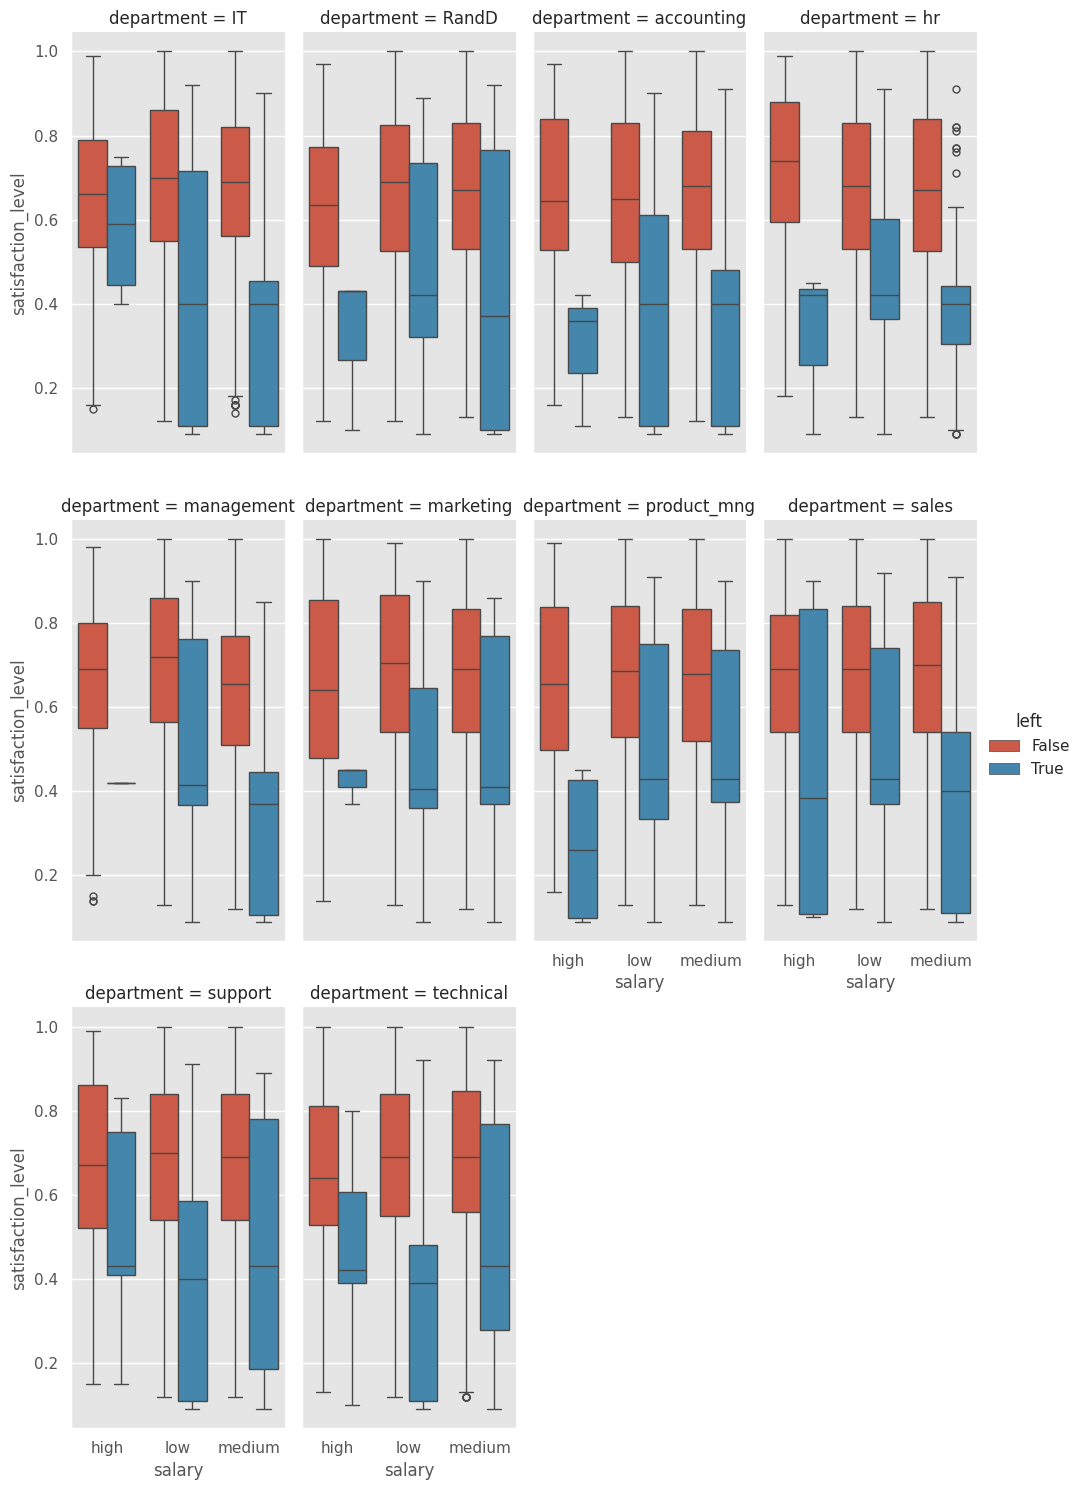

In [155]:
sns.catplot(
    data=ddf, kind="box",
    x="salary", y="satisfaction_level", hue="left", col="department", 
    col_wrap=4, aspect=.5, # height=20
)


> Score of Last Evaluation 

- Score of last evaluation given to the employee

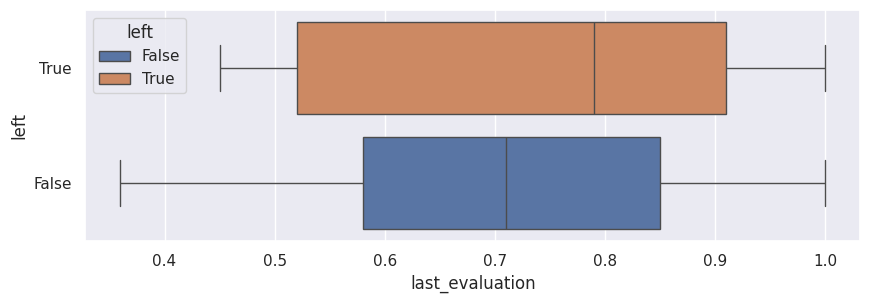

In [147]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(x=ddf.last_evaluation, y=ddf.left.astype(str), hue=ddf.left, ax=ax)
# sns.scatterplot(data=ddf, x="last_evaluation", y="left")
fig.show()
# for left, slighly higher last evaluation score
# but the difference is not significant

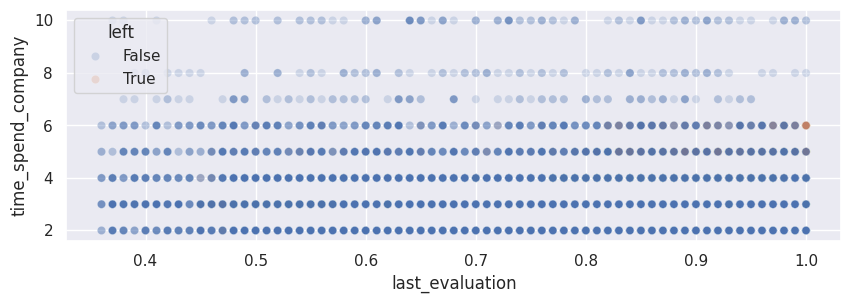

In [153]:
# time at company and evaluation score
fig, ax = plt.subplots(figsize=(10, 3))
sns.scatterplot(
    data=ddf, x="last_evaluation", y="time_spend_company", hue="left", 
    alpha=.2
)
# fig.add(so.Dots(), so.Jitter())
fig.show()
# overalpped, need to apply some jitter

> Nubmer of Projects Contributed


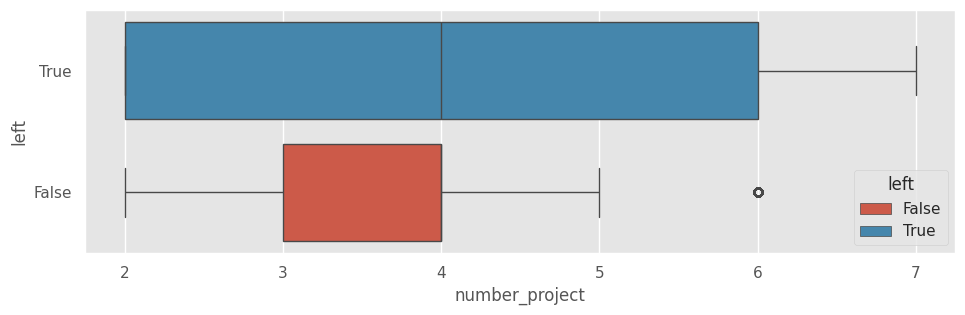

In [156]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(x=ddf.number_project, y=ddf.left.astype(str), hue=ddf.left, ax=ax)
fig.show()
# for left, the number of projects done could range from 2 to 7

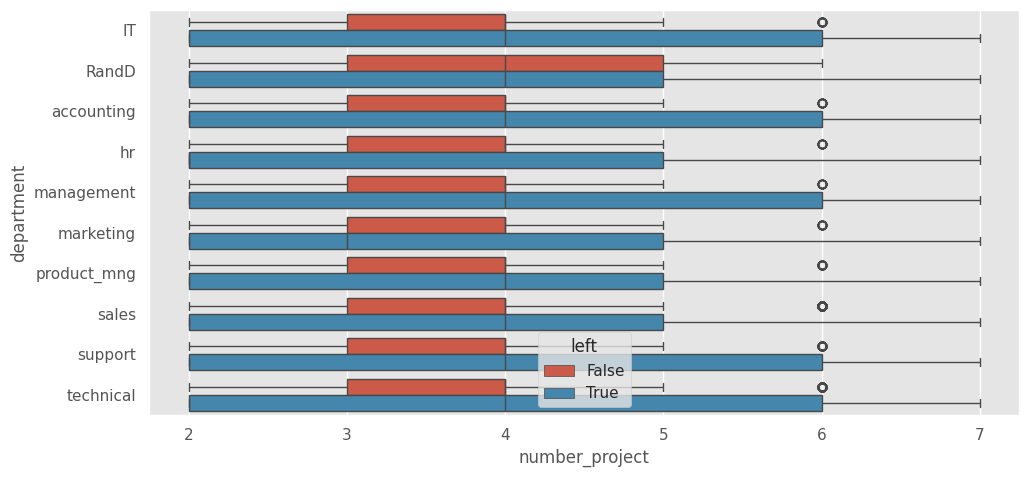

In [159]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x=ddf.number_project, y=ddf.department, hue=ddf.left, ax=ax)
fig.show()
# department-wise, for thos 

> Aaverge Monthly Working Hours


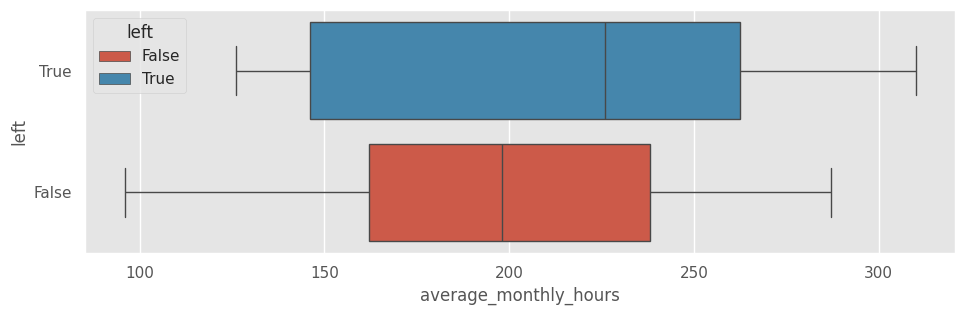

In [161]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(x=ddf.average_monthly_hours, y=ddf.left.astype(str), hue=ddf.left, ax=ax)
fig.show()
# mean of average hour is higher for left than those remained

In [162]:
ddf.average_monthly_hours.describe().to_frame().T
# Average working hours is 200

,count,mean,std,min,25%,50%,75%,max
average_monthly_hours,11991.0,200.473522,48.727813,96.0,157.0,200.0,243.0,310.0


> Time (years) with the Company

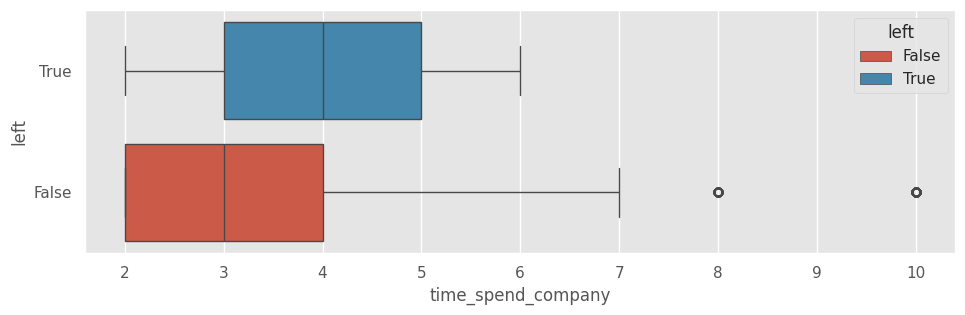

In [164]:
fig, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(x=ddf.time_spend_company, y=ddf.left.astype(str), hue=ddf.left, ax=ax)
fig.show()
# mean of tenure (at company) is higher for those left, 
# but we should consider whether there is differnce in each category

In [167]:
ddf.groupby("time_spend_company").left.value_counts().unstack().T
# count of employees
# no employees with more than 7 years tenure had left

time_spend_company,2,3,4,5,6,7,8,10
left,,,,,,,,
False,2879.0,4316.0,1510.0,580.0,433.0,94.0,81.0,107.0
True,31.0,874.0,495.0,482.0,109.0,NaN,NaN,NaN


In [168]:
ddf.groupby("time_spend_company").left.value_counts(normalize=True).unstack().T
# ratio of employees
# employees are most likely to be left at year 5

time_spend_company,2,3,4,5,6,7,8,10
left,,,,,,,,
False,0.989347,0.831599,0.753117,0.546139,0.798893,1.0,1.0,1.0
True,0.010653,0.168401,0.246883,0.453861,0.201107,NaN,NaN,NaN


##### 

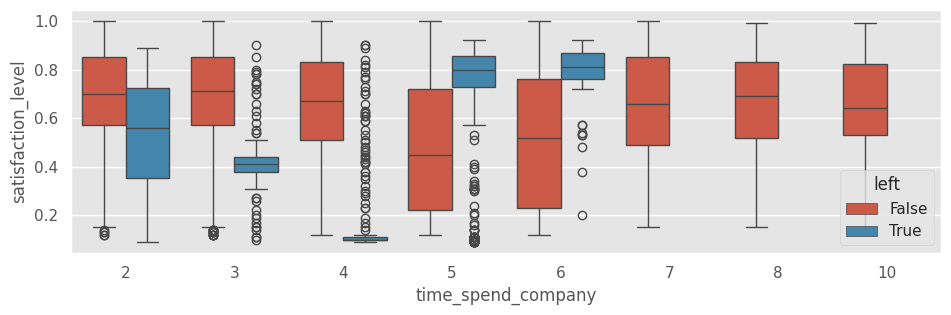

In [172]:
# is tenure related to satisfaction level? 
fig, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(
    x=ddf.time_spend_company, 
    y=ddf.satisfaction_level, 
    hue=ddf.left, ax=ax)
fig.show()
# for those with company for 5 or six years,
# mean score of those left actually had higher satisfaction score, than those stayed
# this is reverse trend to those with less time

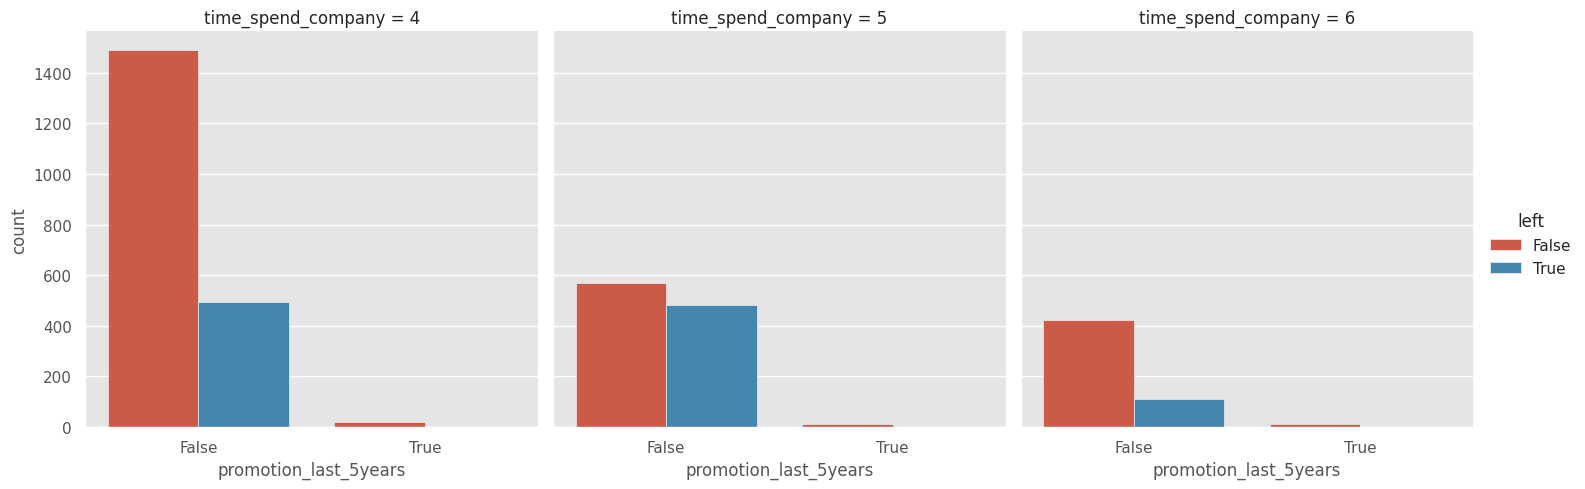

In [176]:
# for those with the company for 4 to 6 years, did they get promotion? 
tmp = ddf.query("time_spend_company >= 4 & time_spend_company <= 6")
sns.catplot(
    data=tmp, kind="count", 
    x="promotion_last_5years", hue="left", col="time_spend_company"
)
# majority of these employees did not get promotion in the last 5 years
# this might be causing high satisfaction but still leave the company

> Had Work Accident or not

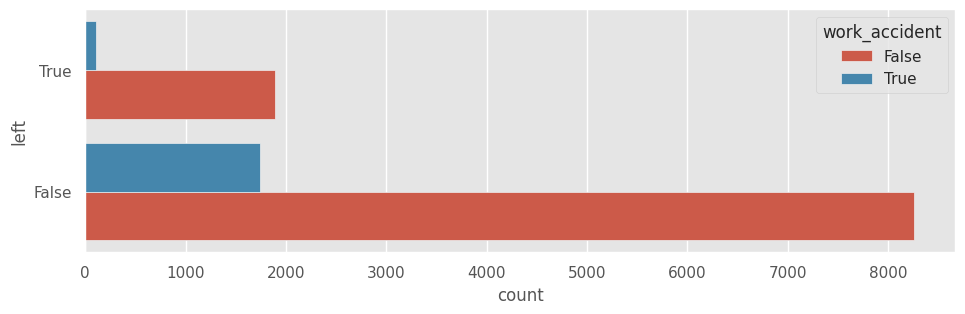

In [177]:
fig, ax = plt.subplots(figsize=(10, 3))
# sns.countplot(y=ddf.work_accident, hue=ddf.left, ax=ax)
sns.countplot(y=ddf.left, hue=ddf.work_accident, ax=ax)
ax.invert_yaxis() # reverse to order of True -> False
fig.show()
# most will have no work accidents while at the company
# but for those have, most will still be with the company

> Had Promotion in last 5 Years or not

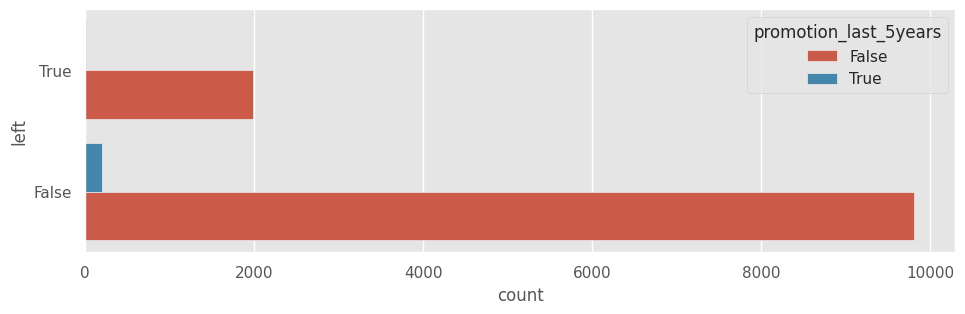

In [178]:
fig, ax = plt.subplots(figsize=(10, 3))
# sns.countplot(y=ddf.promotion_last_5years, hue=ddf.left, ax=ax)
sns.countplot(hue=ddf.promotion_last_5years, y=ddf.left, ax=ax)
ax.invert_yaxis() # reverse to order of True -> False
fig.show()
# for those left, non got promotion in the last 5 years

> Employee's Department

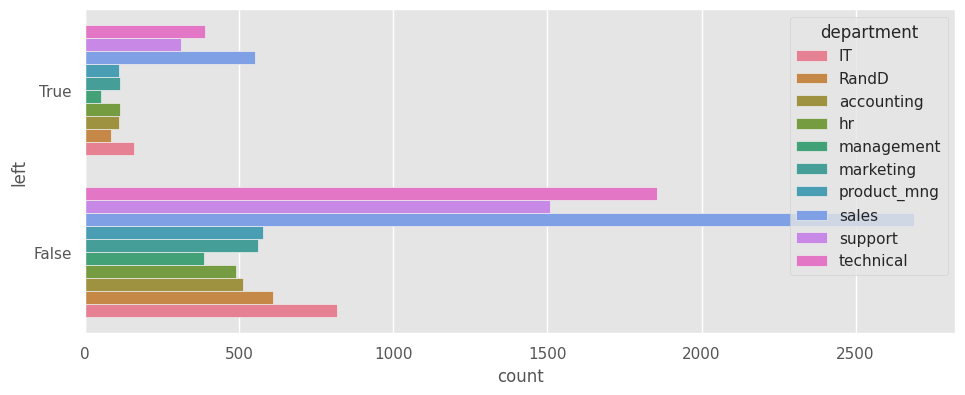

In [179]:
fig, ax = plt.subplots(figsize=(10, 4))
# sns.countplot(y=ddf.department, hue=ddf.left, ax=ax)
sns.countplot(hue=ddf.department, y=ddf.left, ax=ax)
ax.invert_yaxis() # reverse to order of True -> False
fig.show()
# Sales has higher left count, with technical being the second, and then support


> Employee's Salary Band

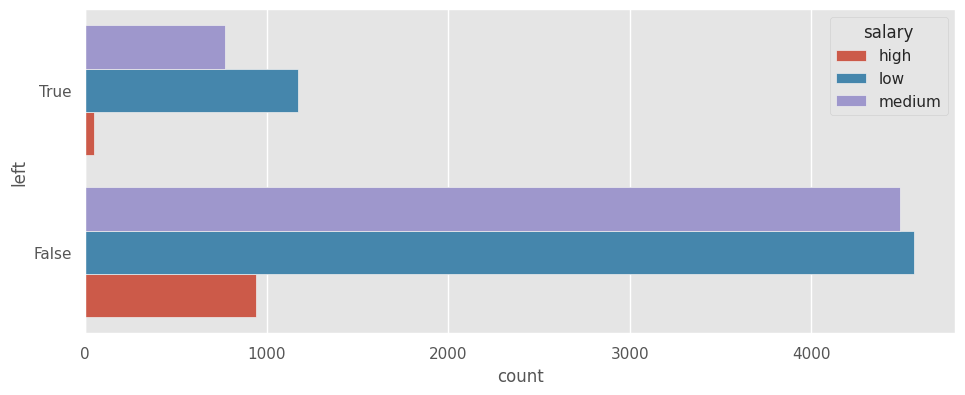

In [180]:
fig, ax = plt.subplots(figsize=(10, 4))
# sns.countplot(y=ddf.salary, hue=ddf.left, ax=ax)
sns.countplot(hue=ddf.salary, y=ddf.left, ax=ax)
ax.invert_yaxis() # reverse to order of True -> False
fig.show()
# higher band salary does mean less left

### Insights

- satfisfaction level does have negative correlation with left or not
- time spend at the compoany also has some correlation with the target variable
  - no employee with more than 7 years have left (in the dataset)
  - highest left ration at 5 years, about 45% had left 
- 
- 

## paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
### Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Model Buildind and Evauluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

#### Identify the type of prediction task.

- Classification task, to predict a given employee will be "left" or not
  - i.e. predict "left" as either `True` or `False`
- With the model, understand which variable has higher impact "left"
  - To drive either employee retention or lower employee churn

#### Identify the types of models most appropriate for this task.

- Start with basic Logistic Regression Model
- Then using Tree models to extract the feature importance

### Code

- Check model assumptions
- Model and Extract Feature Importance 

In [181]:
import graphviz

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    f1_score
)

In [182]:
tmp = pd.get_dummies(ddf)
y = tmp["left"]; 
X = tmp.drop(columns=["left"])
X.shape, y.shape

((11991, 20), (11991,))

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9592, 20), (9592,), (2399, 20), (2399,))

#### Logistic Regression

- Check Assumptions
  - No multi-collinearity between the independent variables
  - X and **logit of y** have linear relationship
  - No Exreme outliers in the dataset 

In [187]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [188]:
log_reg.score(X_test, y_test)
# high accuracy, but we got imbalanced data here

0.8328470195914964

In [189]:
y_pred = log_reg.predict(X_test)

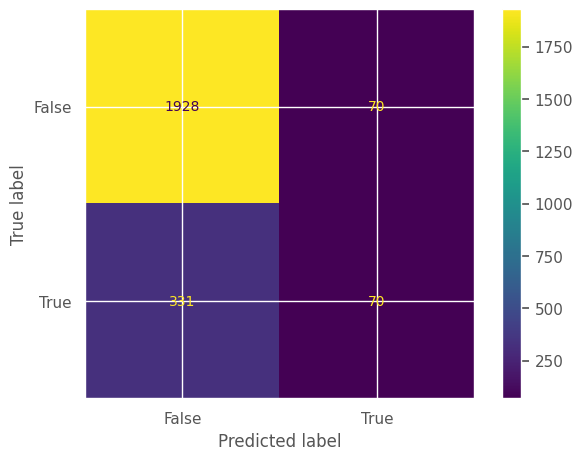

In [190]:
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()

In [191]:
f1_score(y_test, y_pred)

0.2587800369685767

In [192]:
tmp = classification_report(y_test, y_pred, target_names=["not left", "left"])
print(tmp)

              precision    recall  f1-score   support

    not left       0.85      0.96      0.91      1998
        left       0.50      0.17      0.26       401

    accuracy                           0.83      2399
   macro avg       0.68      0.57      0.58      2399
weighted avg       0.79      0.83      0.80      2399



In [194]:
tmp = pd.DataFrame(data={"Feature Name":log_reg.feature_names_in_, "Model Coefficient":log_reg.coef_[0]})
tmp.head()
# poor performance with those left

,Feature Name,Model Coefficient
0,satisfaction_level,-3.913148
1,last_evaluation,0.652335
2,number_project,-0.262995
3,average_monthly_hours,0.003874
4,time_spend_company,0.302135


##### **TODO & Notes**

- Variables at different scale, might need to stnadardise
- Further exploration with the features
  - With the given variables, what are some of the hypotheses with the target variable?
  - Try setup the context with ChatGPT, and discuss possible new features
- ...

#### Decision Tree

In [195]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

tree.score(X_test, y_test)

0.9641517298874531

In [196]:
y_pred = tree.predict(X_test)

tmp = classification_report(y_test, y_pred, target_names=["not left", "left"])
print(tmp)

              precision    recall  f1-score   support

    not left       0.98      0.98      0.98      1998
        left       0.88      0.91      0.89       401

    accuracy                           0.96      2399
   macro avg       0.93      0.94      0.94      2399
weighted avg       0.96      0.96      0.96      2399



##### TODO & Notes

- Tree classifier performed better than LogisticRegression, even with just one tree
- Plot tree with `plot_tree` function or module `graphviz`

#### RandomForest

In [124]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9791579824927052

In [125]:
y_pred = rf.predict(X_test)

tmp = classification_report(y_test, y_pred, target_names=["not left", "left"])
print(tmp)

              precision    recall  f1-score   support

    not left       0.98      1.00      0.99      1998
        left       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



##### TODO & Notes

- Performance with F1 score is slightly better with employees who have "left" 
  - Compared with Decision Tree

#### XGBoost

In [126]:
xgb = XGBClassifier()

## pacE: Execute Stage

- Interpret model performance and results
- Share actionable steps with stakeholders

✏
### Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Results and Evaluation

- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.